In [41]:
!pip3 install -q xlrd xlwt
!pip3 install -q openpyxl
!pip3 install -q scipy
!pip3 install -q pandas
!pip3 install -q matplotlib
!pip3 install -q seaborn
# !pip3 install -q keras
!pip3 install -q tensorflow



In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


markers_cycler = itertools.cycle(('o', 'v', '^', '<', '>', 's', 'D','8', 'p','*','h','H','d','+','X',))  
linestyle_cycler = itertools.cycle(('-', '--', '-.', ':', '', (0, (1, 10)), (0, (1, 1)), (0, (1, 1)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1)), (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)),(0, (3, 5, 1, 5, 1, 5)),(0, (3, 10, 1, 10, 1, 10)), (0, (3, 1, 1, 1, 1, 1))))

In [43]:
fileData = 'raw_data'

dataFolder = 'data'
# rawPath = os.path.join(dataFolder, fileData + '.xlsx')
# rawDataset = pd.read_excel(rawPath, engine='openpyxl')

rawPath = os.path.join(dataFolder, fileData + '.xlsx')
rawDataset = pd.read_excel(rawPath, 
                            index_col=0
                            )

# create result folder
outFolder = 'dataOut'
if not os.path.exists(outFolder):
    os.mkdir(outFolder)

# create work result folder
workPath = os.path.join(outFolder, fileData)
if not os.path.exists(workPath):
    os.mkdir(workPath)

filePath = os.path.join(workPath, fileData)

In [44]:
# rawDataset = pd.read_excel('.xls', index_col=0)
rawDataset

,Stack,DischargeTemp,Diameter,ExitVelocity,ReleaseHeight,PM10,SO2,NOX,VOC,CO
SN,,,,,,,,,,
1,Flare1,1540,6.60,4.52,66.0,0.00,0.00,0.001,0.003,0.005
2,Flare2,1540,6.60,4.52,66.0,0.00,0.00,0.001,0.003,0.005
3,Flare3,330,2.75,23.47,67.0,0.00,54.50,7.900,24.300,1510.400
4,FCCU,550,2.18,9.05,30.0,0.00,304.10,1420.100,0.000,106.000
5,Boiler3,550,2.18,9.05,30.0,0.00,304.10,1420.100,0.000,106.000
...,...,...,...,...,...,...,...,...,...,...
72,Flare1,980,1.28,2.88,42.0,0.00,0.00,0.010,0.030,0.070
73,FCCU,19,350.00,1.39,19.0,0.00,2930.40,13678.800,0.000,983.800
74,Boiler1,19,0.00,1.39,19.0,0.00,0.00,13678.800,0.000,983.800


In [45]:
rawDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 1 to 76
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stack          76 non-null     object 
 1   DischargeTemp  76 non-null     int64  
 2   Diameter       76 non-null     float64
 3   ExitVelocity   76 non-null     float64
 4   ReleaseHeight  76 non-null     float64
 5   PM10           76 non-null     float64
 6   SO2            76 non-null     float64
 7   NOX            76 non-null     float64
 8   VOC            76 non-null     float64
 9   CO             76 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.5+ KB


In [46]:
dataset = rawDataset.copy()
dataset.head()

,Stack,DischargeTemp,Diameter,ExitVelocity,ReleaseHeight,PM10,SO2,NOX,VOC,CO
SN,,,,,,,,,,
1,Flare1,1540,6.60,4.52,66.0,0.0,0.0,0.001,0.003,0.005
2,Flare2,1540,6.60,4.52,66.0,0.0,0.0,0.001,0.003,0.005
3,Flare3,330,2.75,23.47,67.0,0.0,54.5,7.900,24.300,1510.400
4,FCCU,550,2.18,9.05,30.0,0.0,304.1,1420.100,0.000,106.000
5,Boiler3,550,2.18,9.05,30.0,0.0,304.1,1420.100,0.000,106.000


In [47]:
dataset.isna().sum()

Stack            0
DischargeTemp    0
Diameter         0
ExitVelocity     0
ReleaseHeight    0
PM10             0
SO2              0
NOX              0
VOC              0
CO               0
dtype: int64

In [48]:
dataset = dataset.dropna()

In [49]:
prefix = ['Stack']
dataset = pd.get_dummies(dataset, prefix=prefix, prefix_sep='_')
dataset

,DischargeTemp,Diameter,ExitVelocity,ReleaseHeight,PM10,SO2,NOX,VOC,CO,Stack_Boiler1,Stack_Boiler2,Stack_Boiler3,Stack_Boiler4,Stack_FCCU,Stack_Flare1,Stack_Flare2,Stack_Flare3,Stack_Flare4,Stack_Heater1,Stack_Heater2
SN,,,,,,,,,,,,,,,,,,,,
1,1540,6.60,4.52,66.0,0.00,0.00,0.001,0.003,0.005,0,0,0,0,0,1,0,0,0,0,0
2,1540,6.60,4.52,66.0,0.00,0.00,0.001,0.003,0.005,0,0,0,0,0,0,1,0,0,0,0
3,330,2.75,23.47,67.0,0.00,54.50,7.900,24.300,1510.400,0,0,0,0,0,0,0,1,0,0,0
4,550,2.18,9.05,30.0,0.00,304.10,1420.100,0.000,106.000,0,0,0,0,1,0,0,0,0,0,0
5,550,2.18,9.05,30.0,0.00,304.10,1420.100,0.000,106.000,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,980,1.28,2.88,42.0,0.00,0.00,0.010,0.030,0.070,0,0,0,0,0,1,0,0,0,0,0
73,19,350.00,1.39,19.0,0.00,2930.40,13678.800,0.000,983.800,0,0,0,0,1,0,0,0,0,0,0
74,19,0.00,1.39,19.0,0.00,0.00,13678.800,0.000,983.800,1,0,0,0,0,0,0,0,0,0,0


In [50]:
dataset.columns

Index(['DischargeTemp', 'Diameter ', 'ExitVelocity', 'ReleaseHeight', 'PM10',
       'SO2', 'NOX', 'VOC', 'CO', 'Stack_Boiler1', 'Stack_Boiler2',
       'Stack_Boiler3', 'Stack_Boiler4', 'Stack_FCCU', 'Stack_Flare1',
       'Stack_Flare2', 'Stack_Flare3', 'Stack_Flare4', 'Stack_Heater1',
       'Stack_Heater2'],
      dtype='object')

In [51]:
outFeatures = ['PM10', 'SO2', 'NOX', 'VOC', 'CO']
inFeatures = ['DischargeTemp', 'Diameter ', 'ExitVelocity', 'ReleaseHeight', 
        'Stack_Boiler1', 'Stack_Boiler2',
       'Stack_Boiler3', 'Stack_Boiler4', 'Stack_FCCU', 'Stack_Flare1',
       'Stack_Flare2', 'Stack_Flare3', 'Stack_Flare4', 'Stack_Heater1',
       'Stack_Heater2']

In [59]:
favCols0 = ['PM10', 'SO2', 'NOX', 'VOC', 'CO']
favCols = ['PM10', 'SO2', 'NOX', 'VOC', 'CO', 'DischargeTemp', 'Diameter ', 'ExitVelocity', 'ReleaseHeight']
dataset[favCols]

,PM10,SO2,NOX,VOC,CO,DischargeTemp,Diameter,ExitVelocity,ReleaseHeight
SN,,,,,,,,,
1,0.00,0.00,0.001,0.003,0.005,1540,6.60,4.52,66.0
2,0.00,0.00,0.001,0.003,0.005,1540,6.60,4.52,66.0
3,0.00,54.50,7.900,24.300,1510.400,330,2.75,23.47,67.0
4,0.00,304.10,1420.100,0.000,106.000,550,2.18,9.05,30.0
5,0.00,304.10,1420.100,0.000,106.000,550,2.18,9.05,30.0
...,...,...,...,...,...,...,...,...,...
72,0.00,0.00,0.010,0.030,0.070,980,1.28,2.88,42.0
73,0.00,2930.40,13678.800,0.000,983.800,19,350.00,1.39,19.0
74,0.00,0.00,13678.800,0.000,983.800,19,0.00,1.39,19.0


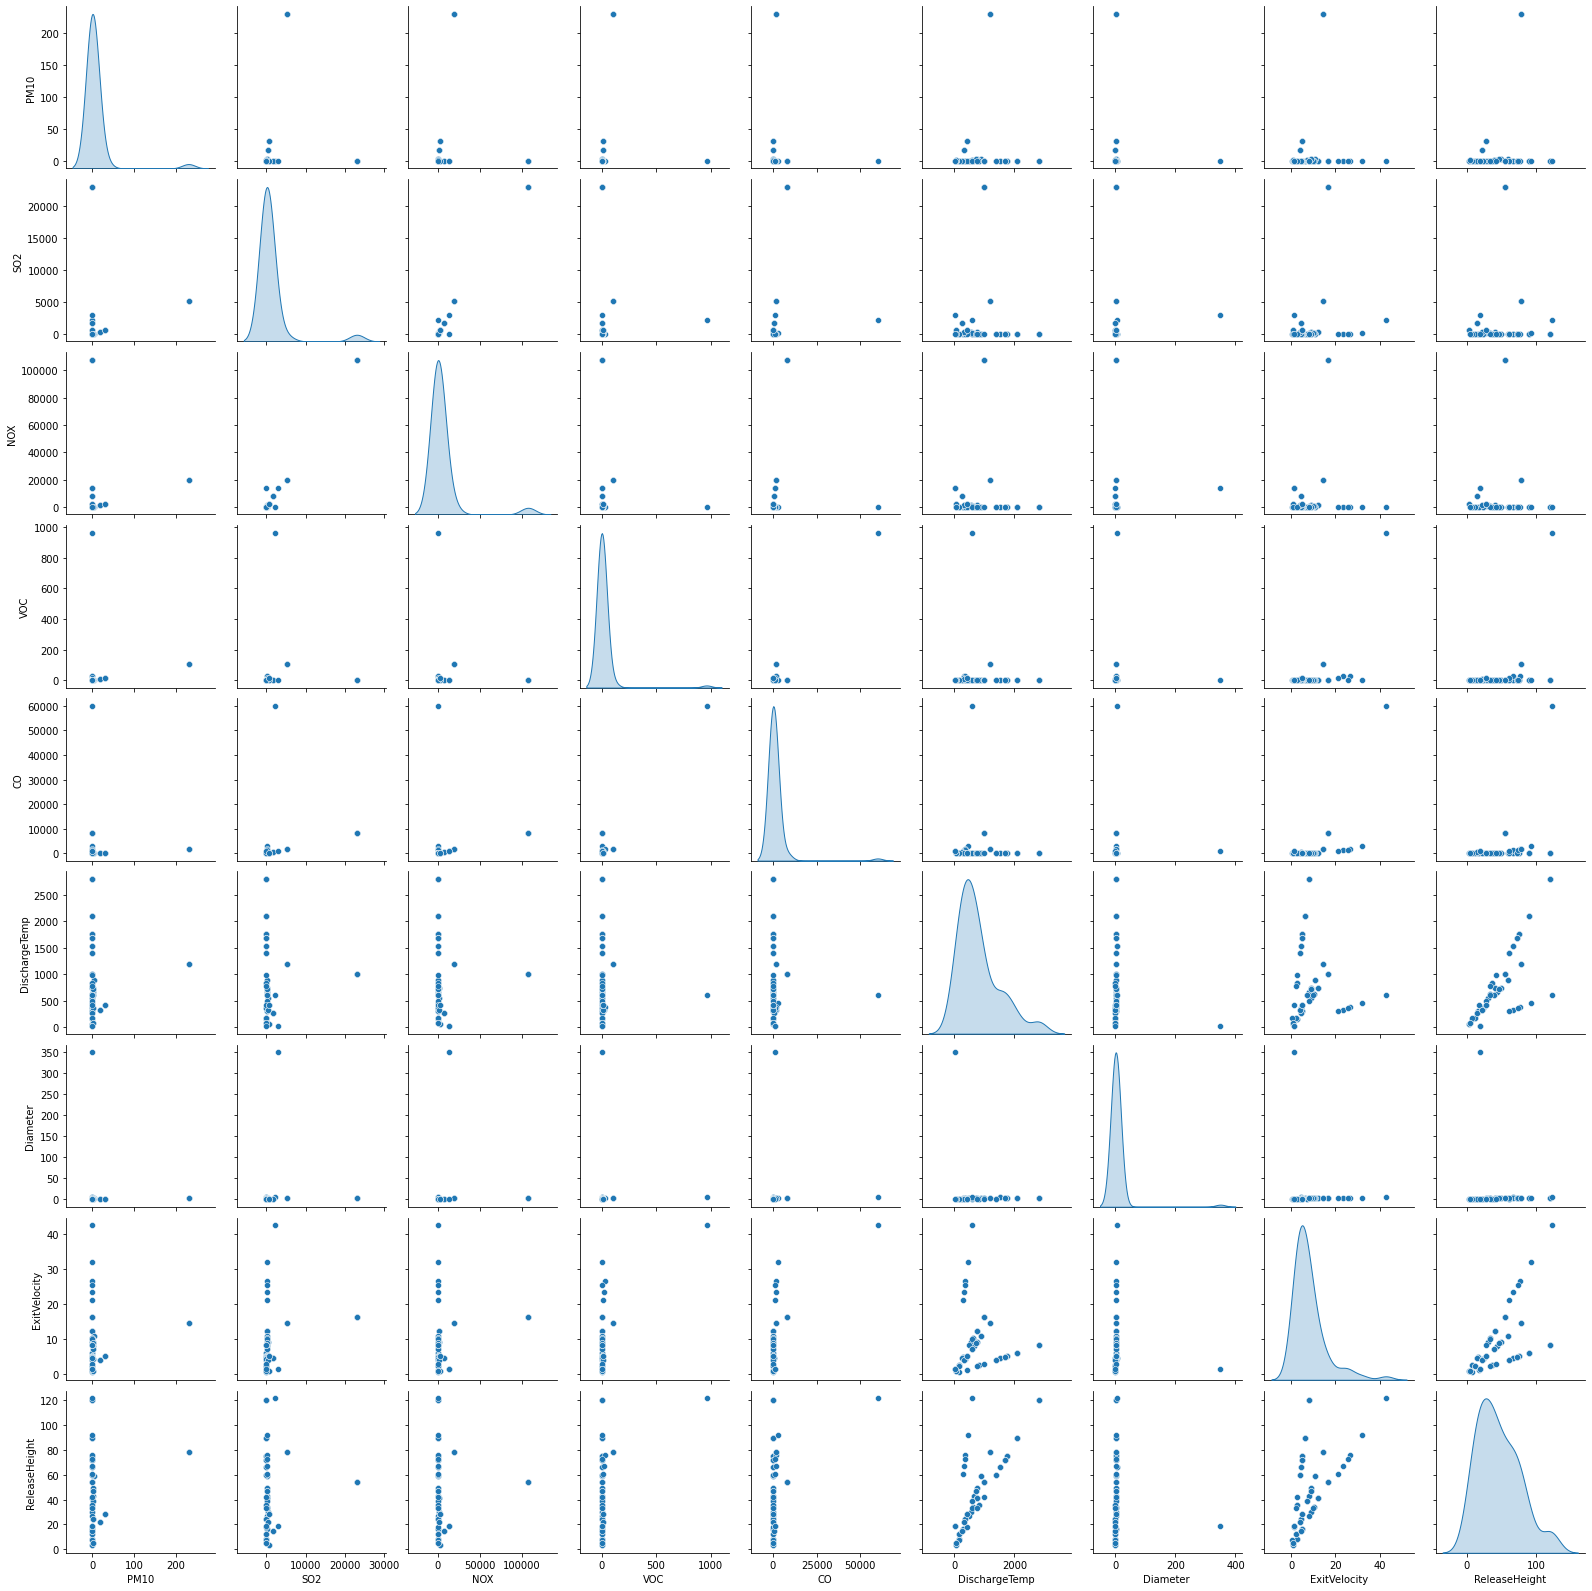

In [60]:
sns.pairplot(dataset[favCols], diag_kind='kde')

fname = filePath + '_pairplot_fav'

plt.savefig(fname + '.svg')
plt.savefig(fname + '.png')

plt.show()

In [61]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DischargeTemp,76.0,806.776316,677.901165,19.00000,330.000,612.500,1000.0000,2800.00
Diameter,76.0,6.684474,39.928214,0.00000,1.100,2.190,2.7500,350.00
ExitVelocity,76.0,8.098684,7.457241,0.49000,4.110,5.130,9.3475,42.68
ReleaseHeight,76.0,45.725000,30.119195,3.00000,22.000,41.000,66.2500,122.00
PM10,76.0,7.733421,37.195345,0.00000,0.000,0.000,0.6000,229.86
SO2,76.0,1245.971053,4546.036332,0.00000,0.000,47.600,267.8000,23040.00
NOX,76.0,5712.133264,21165.948693,0.00007,0.085,143.200,1250.7000,107605.40
VOC,76.0,17.255295,111.361261,0.00000,0.000,0.003,0.8000,962.90
CO,76.0,1339.126111,7009.042717,0.00040,0.535,19.750,156.5975,60006.00
Stack_Boiler1,76.0,0.078947,0.271448,0.00000,0.000,0.000,0.0000,1.00


In [63]:
interestCols = outFeatures + inFeatures
interestCols

['PM10',
 'SO2',
 'NOX',
 'VOC',
 'CO',
 'DischargeTemp',
 'Diameter ',
 'ExitVelocity',
 'ReleaseHeight',
 'Stack_Boiler1',
 'Stack_Boiler2',
 'Stack_Boiler3',
 'Stack_Boiler4',
 'Stack_FCCU',
 'Stack_Flare1',
 'Stack_Flare2',
 'Stack_Flare3',
 'Stack_Flare4',
 'Stack_Heater1',
 'Stack_Heater2']

In [64]:
dataX = dataset[interestCols].copy()

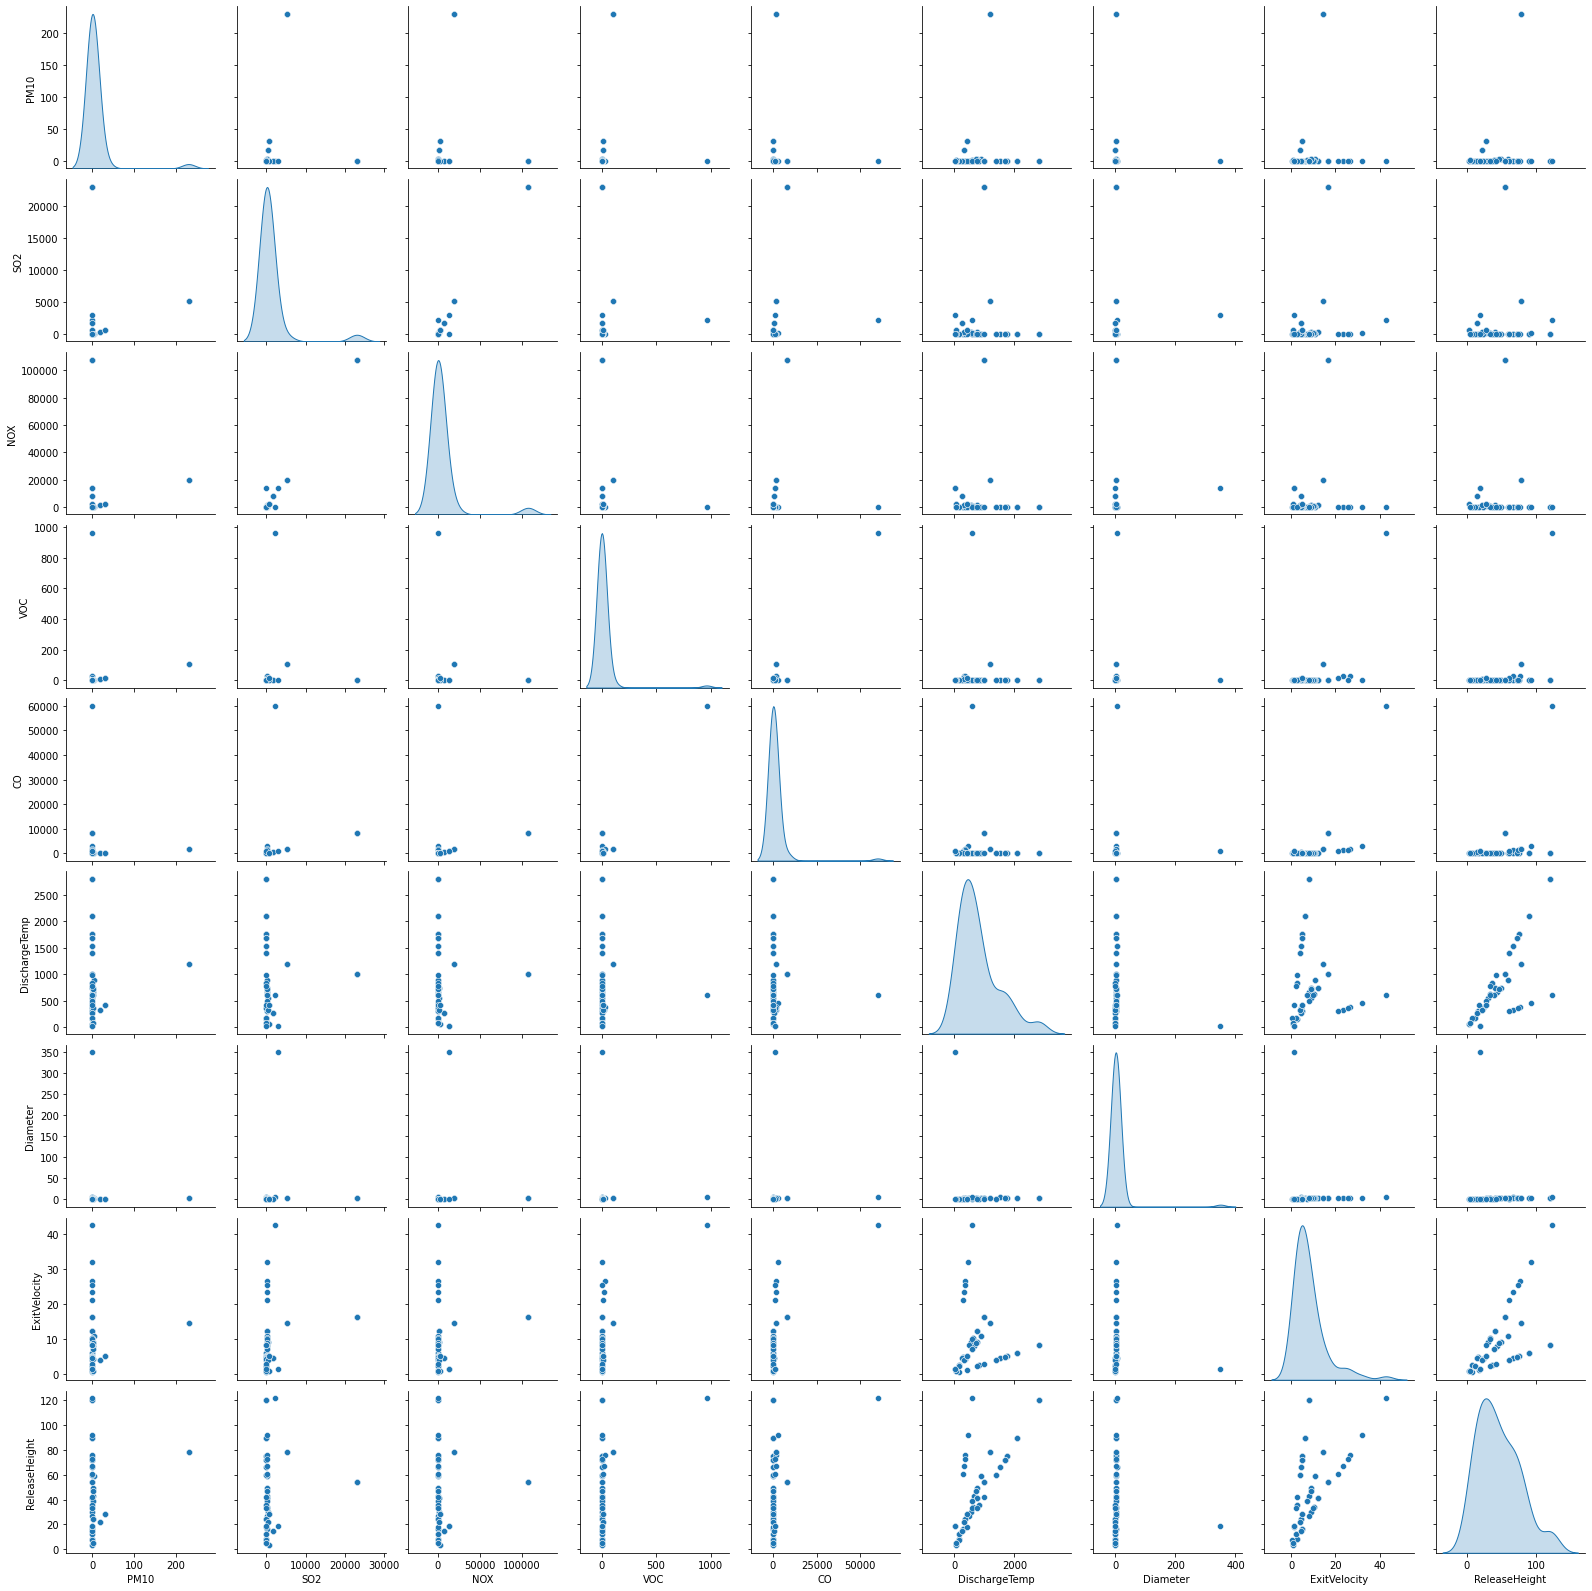

In [65]:
h = 1

X = dataX.loc[::h]
sns.pairplot(X[favCols], diag_kind='kde')

fname = filePath + '_pairplot_X'

plt.savefig(fname + '.svg')
plt.savefig(fname + '.png')

plt.show()
